In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn import svm

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [5]:
train = pd.read_csv("voting_train.csv")
test = pd.read_csv("voting_test.csv")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      218 non-null    int64 
 1   class                                   218 non-null    object
 2   handicapped-infants                     218 non-null    object
 3   water-project-cost-sharing              218 non-null    object
 4   adoption-of-the-budget-resolution       218 non-null    object
 5   physician-fee-freeze                    218 non-null    object
 6   el-salvador-aid                         218 non-null    object
 7   religious-groups-in-schools             218 non-null    object
 8   anti-satellite-test-ban                 218 non-null    object
 9   aid-to-nicaraguan-contras               218 non-null    object
 10  mx-missile                              218 non-null    object
 11  immigr

In [7]:
train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,67,republican,n,y,n,y,y,y,y,n,n,n,y,y,y,y,n,y
1,338,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
2,35,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
3,122,republican,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
4,420,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      217 non-null    int64 
 1   handicapped-infants                     217 non-null    object
 2   water-project-cost-sharing              217 non-null    object
 3   adoption-of-the-budget-resolution       217 non-null    object
 4   physician-fee-freeze                    217 non-null    object
 5   el-salvador-aid                         217 non-null    object
 6   religious-groups-in-schools             217 non-null    object
 7   anti-satellite-test-ban                 217 non-null    object
 8   aid-to-nicaraguan-contras               217 non-null    object
 9   mx-missile                              217 non-null    object
 10  immigration                             217 non-null    object
 11  synfue

In [9]:
test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,430,y,n,y,n,unknown,n,y,y,y,y,n,y,n,unknown,y,y
1,411,n,n,n,y,y,y,n,n,n,n,y,y,y,y,n,y
2,167,y,n,y,y,y,y,y,y,n,y,n,y,n,y,y,y
3,99,y,y,y,n,n,y,y,y,y,y,n,n,n,n,n,y
4,415,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [10]:
X_train = train.drop(["ID", "class"], axis=1)
y_train = train["class"]

X_test = test.drop(["ID"], axis=1)

# Pre-processing

## Encoding

In [11]:
ohe = OneHotEncoder()
X_train_enc = ohe.fit_transform(X_train)
X_test_enc = ohe.fit_transform(X_test)

# Exploratory data analysis

In [12]:
X_train.isnull().sum()

handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-crporation-cutback               0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

# Feature Selection

Feature 0: 22.572159
Feature 1: 0.213391
Feature 2: 29.292517
Feature 3: 0.200557
Feature 4: 1.244920
Feature 5: 0.887962
Feature 6: 67.698022
Feature 7: 0.088086
Feature 8: 49.885813
Feature 9: 82.107549
Feature 10: 1.049617
Feature 11: 100.947269
Feature 12: 66.102861
Feature 13: 0.213391
Feature 14: 58.434258
Feature 15: 29.823134
Feature 16: 2.304012
Feature 17: 17.170968
Feature 18: 24.366743
Feature 19: 0.611795
Feature 20: 19.939123
Feature 21: 49.976756
Feature 22: 5.304442
Feature 23: 47.609013
Feature 24: 39.253464
Feature 25: 4.608025
Feature 26: 36.142908
Feature 27: 0.887962
Feature 28: 0.706781
Feature 29: 0.551945
Feature 30: 12.002552
Feature 31: 0.264258
Feature 32: 24.365897
Feature 33: 51.493377
Feature 34: 0.352344
Feature 35: 63.930472
Feature 36: 32.608490
Feature 37: 0.064854
Feature 38: 27.240355
Feature 39: 58.313254
Feature 40: 1.287269
Feature 41: 34.675489
Feature 42: 21.292091
Feature 43: 1.843665
Feature 44: 33.405960
Feature 45: 20.685537
Feature 46: 9.22

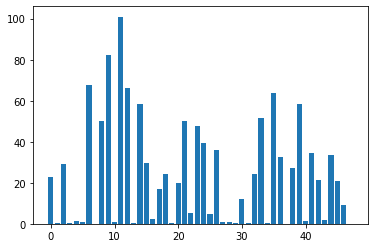

In [13]:
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

fs = SelectKBest(score_func=chi2, k=20)
fs.fit(X_train_enc, y_train)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Model selection

In [14]:
# Simple Grid Search to find best hyperparameters for different classifier

cv = 10          # number of folds
verbose = 1     # information shown during training

## KNN

In [23]:
parameters = {
"n_neighbors":[1, 5, 10, 20], 
"weights":["uniform", "distance"],
"metric":["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]}
knn = GridSearchCV(neighbors.KNeighborsClassifier(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
knn.fit(X_train_enc, y_train)

knn_results = pd.DataFrame(knn.cv_results_)
knn_results= knn_results[["param_n_neighbors", "param_weights", "param_metric", "mean_test_score"]]    
knn_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


,param_n_neighbors,param_weights,param_metric,mean_test_score
31,20,distance,minkowski,0.930434
7,20,distance,euclidean,0.930434
30,20,uniform,minkowski,0.930434
15,20,distance,manhattan,0.930434
14,20,uniform,manhattan,0.930434
6,20,uniform,euclidean,0.930434
28,10,uniform,minkowski,0.929826
12,10,uniform,manhattan,0.929826
4,10,uniform,euclidean,0.929826
13,10,distance,manhattan,0.929815


## Decision Tree

In [24]:
parameters = {
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"], 
    "max_depth":["None", 5, 10, 20],
    "max_features":["auto", "sqrt", "log2"]}    
dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
dt.fit(X_train_enc, y_train)

dt_results = pd.DataFrame(dt.cv_results_)
dt_results = dt_results[["param_criterion", "param_splitter", "param_max_depth", "param_max_features", "mean_test_score"]]
dt_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


,param_criterion,param_splitter,param_max_depth,param_max_features,mean_test_score
34,entropy,best,5,log2,0.944847
7,gini,random,5,auto,0.935130
19,gini,random,20,auto,0.934965
17,gini,random,10,log2,0.934031
37,entropy,random,10,auto,0.930930
30,entropy,best,5,auto,0.930754
31,entropy,random,5,auto,0.930334
6,gini,best,5,auto,0.930129
16,gini,best,10,log2,0.926653
41,entropy,random,10,log2,0.926260


## Random Forest

In [25]:
parameters = {
    "n_estimators":[10, 50, 100, 200, 300], 
    "criterion":["gini", "entropy"], 
    "max_depth":["None", 5, 10, 20],
    "max_features":["auto", "sqrt", "log2"]}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
rf.fit(X_train_enc, y_train)

rf_results = pd.DataFrame(rf.cv_results_)
rf_results = rf_results[["param_n_estimators", "param_criterion", "param_max_depth", "param_max_features", "mean_test_score"]]
rf_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


,param_n_estimators,param_criterion,param_max_depth,param_max_features,mean_test_score
100,10,entropy,10,log2,0.963198
29,300,gini,5,log2,0.958699
113,200,entropy,20,sqrt,0.958699
94,300,entropy,10,auto,0.958699
86,50,entropy,5,log2,0.958699
48,200,gini,20,auto,0.958699
17,100,gini,5,auto,0.958699
22,100,gini,5,sqrt,0.958659
106,50,entropy,20,auto,0.958659
96,50,entropy,10,sqrt,0.958603


## SVM

In [280]:
from sklearn import svm

parameters = {
    "C":[1, 5, 10, 15, 20],
    "kernel":["linear", "sigmoid", "rbf", "poly"],     
    "degree":[3, 5, 10],
    "gamma":["scale", "auto"],
    "class_weight":["None", "balanced"]}
svm = GridSearchCV(svm.SVC(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
svm.fit(X_train_enc, y_train)

svm_results = pd.DataFrame(svm.cv_results_)
svm_results = svm_results[["param_C", "param_kernel", "param_degree", "param_gamma", "param_class_weight", "mean_test_score"]]
svm_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


,param_C,param_kernel,param_degree,param_gamma,param_class_weight,mean_test_score
221,20,sigmoid,3,auto,balanced,0.967965
229,20,sigmoid,5,auto,balanced,0.967965
189,15,sigmoid,10,auto,balanced,0.967965
181,15,sigmoid,5,auto,balanced,0.967965
173,15,sigmoid,3,auto,balanced,0.967965
237,20,sigmoid,10,auto,balanced,0.967965
24,1,linear,3,scale,balanced,0.967749
40,1,linear,10,scale,balanced,0.967749
28,1,linear,3,auto,balanced,0.967749
32,1,linear,5,scale,balanced,0.967749


## Logistic Regression

In [235]:
parameters = {
    "penalty":["l1", "l2", "elasticnet", "none"], 
    "C":[1, 5, 10, 20],
    "class_weight":["None", "balanced"],
    "solver":["liblinear"]}
logreg = GridSearchCV(LogisticRegression(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
logreg.fit(X_train_enc, y_train)

logreg_results = pd.DataFrame(logreg.cv_results_)
logreg_results = logreg_results[["param_penalty", "param_C", "param_class_weight", "mean_test_score"]]
logreg_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,param_penalty,param_C,param_class_weight,mean_test_score
13,l2,5,balanced,0.963319
21,l2,10,balanced,0.958774
4,l1,1,balanced,0.958668
5,l2,1,balanced,0.958668
12,l1,5,balanced,0.949577
29,l2,20,balanced,0.949577
20,l1,10,balanced,0.935729
28,l1,20,balanced,0.935729
0,l1,1,None,NaN
1,l2,1,None,NaN


## Stochastic Gradient Descent

In [236]:
parameters = {
    "loss":["hinge", "log", "modified_huber", "squared_hinge", "perceptron"], 
    "penalty":["l2", "l1", "elasticnet"],
    "alpha":[0.0001, 0.001, 0.01]}
sgd = GridSearchCV(SGDClassifier(), parameters, cv=cv, verbose=verbose, scoring="f1_weighted")
sgd.fit(X_train_enc, y_train)

sgd_results = pd.DataFrame(sgd.cv_results_)
sgd_results = sgd_results[["param_loss", "param_penalty", "param_alpha", "mean_test_score"]]
sgd_results.sort_values(["mean_test_score"], ascending=False).head(10)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


,param_loss,param_penalty,param_alpha,mean_test_score
44,perceptron,elasticnet,0.01,0.967970
35,log,elasticnet,0.01,0.963319
17,hinge,elasticnet,0.001,0.963319
14,perceptron,elasticnet,0.0001,0.958774
10,squared_hinge,l1,0.0001,0.958668
33,log,l2,0.01,0.958668
34,log,l1,0.01,0.958668
20,log,elasticnet,0.001,0.954228
21,modified_huber,l2,0.001,0.954123
31,hinge,l1,0.01,0.954123


# Final model

In [257]:
model = svm.SVC(C=1, kernel="poly", degree=3, gamma="scale", class_weight="balanced")
model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', kernel='poly')

In [258]:
predictions = pd.DataFrame(test["ID"])
predictions["class"] = model.predict(X_test_fs)

In [259]:
predictions.to_csv("submission.csv", index=False)